In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Physics 581 Lab 1
##  Part 4 Markov Chain Monte Carlo

### Group 1: Rebecca Booth and Nathan Meulenbroek 

## 4.1.1 Markov chain: The classical example

In this section we use a 2-dimensional state vector to describing the weather,

$$
x = \left(\begin{array}{cc} 
Sunny\\
Rainy
\end{array}\right)
$$ 

The transition matrix, P, will be used to determine the $i^{th}$ state:

$$
P = \left(\begin{array}{cc} 
0.9 & 0.1\\
0.5 & 0.5
\end{array}\right)
$$ 


In [439]:
def construct_P(a, c):
    '''
    This function returns a 2x2 NumPy array of the form, 
    
    |a  b|
    |c  d|
    
    Where b = 1-a
    and   d = 1-c
                                                
    '''
    return np.array([[a, 1-a],[c, 1-c]])

If the weather is sunny today, the initial state vector is,

$$
x_0 = \left(\begin{array}{cc} 
1\\
0
\end{array}\right)
$$ 

The weather tomorrow is described by the state vector $x_1$, where

$$
x_1 = x_0 \cdot P = 
\left(\begin{array}{cc} 
1\\
0
\end{array}\right)
\cdot
\left(\begin{array}{cc} 
0.9 & 0.1\\
0.5 & 0.5
\end{array}\right) 
= 
\left(\begin{array}{cc} 
0.9\\
0.1
\end{array}\right)
$$ 

This indicates a 90% chance of sun and 10% chance of rain.



In [441]:
# Predict the weather tomorrow

# construct the transition matrix
P = construct_P(0.9, 0.5)

# initial state vector, n=0 (today is sunny)
x0 = np.array([1,0])

# state n=1 (tomorrow)
x1 = np.dot(x0,P)

print('x1 =',x1)

x1 = [ 0.9  0.1]


The day after tomorrow the weather is predicted by the state vector $x_2$, 


$$
x_2 = x_1 \cdot P = 
\left(\begin{array}{cc} 
0.9\\
0.1
\end{array}\right)
\cdot
\left(\begin{array}{cc} 
0.9 & 0.1\\
0.5 & 0.5
\end{array}\right) 
= 
\left(\begin{array}{cc} 
0.86\\
0.14
\end{array}\right)
$$ 

This indicates a 86% chance of sun and 14% chance of rain.


In [442]:
# Predict the weather the day after tomorrow

# state n=2 (the day after tomorrow)
x2 = np.dot(x1,P)

print(x2)

[ 0.86  0.14]


## 4.1.2 Steady State Distributions

If you keep forecasting the weather using $x_i = x_0 \cdot P^n$, the Markov chain eventually reaches an equilibrium probability where the forecast on day $x_i$ is the same as the forecast on day $x_{i+1}$. 

In [448]:
  def get_forecast(P, x0, numdays):
    '''
    Applies a Markov Chain to the initial state vector x0 using the transition matrix P.
    Returns a list containing the resulting chain with elements x_i+1 = x_i P, for 'numdays' iterations. 
    
    '''
    # set the first iteration to the initial state vector
    xn = x0
    
    # store the vector components in lists
    P_if_sunny = [xn[0]]
    P_if_rainy = [xn[1]]
    
    for day in range(numdays):
        
        # iterate the Markov Chain: x_i+1 = x_i P 
        xn = np.dot(xn,P)

        # append the lists with resulting vector components 
        P_if_sunny += [xn[0]]
        P_if_rainy += [xn[1]]
        
    # return the lists containing the Markov Chain results
    return P_if_sunny, P_if_rainy

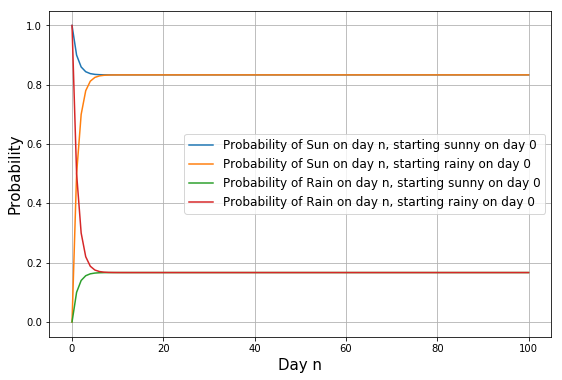

In [449]:
# Plot the Markov chain for initial state x0=(1,0)

# construct the transition matrix
P = construct_P(0.9, 0.5)

# initial state sunny
x0sun = np.array([1,0])
sun_P_if_sunny, rain_P_if_sunny = get_forecast(P, x0sun, 100)

# initial state rainy
x0rain = np.array([0,1])
sun_P_if_rainy, rain_P_if_rainy = get_forecast(P, x0rain, 100)


# ***************** plotting results *****************
plt.figure(figsize=(9,6))
plt.plot(sun_P_if_sunny, label='Probability of Sun on day n, starting sunny on day 0')
plt.plot(sun_P_if_rainy, label='Probability of Sun on day n, starting rainy on day 0')

plt.plot(rain_P_if_sunny, label='Probability of Rain on day n, starting sunny on day 0')
plt.plot(rain_P_if_rainy, label='Probability of Rain on day n, starting rainy on day 0')
plt.legend(loc='best', fontsize=12)

plt.grid('on')

plt.xlabel('Day n', fontsize=15)
plt.ylabel('Probability', fontsize=15);

This system reaches an equilibrium state quite quickly (around day 10), and the forecast remains the same there after. 

In [355]:
# print the steady state probabilities and check that they sum to 1
print('The steady state probability of sun is', sun_P_if_sunny[-1])
print('The steady state probability of rain is', rain_P_if_rainy[-1])
print('The probability of getting weather should sum to 1, let\'s check: P_sun + P_rain =',  sun_P_if_sunny[-1]+rain_P_if_rainy[-1])

The steady state probability of sun is 0.833333333333
The steady state probability of rain is 0.166666666667
The probability of getting weather should sum to 1, let's check: P_sun + P_rain = 1.0


For a general $2\times 2$ transition matrix, P, 

$$
P = \left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$ 

Where $a+b = 1$ and $c+d = 1$,

We anticipate that the steady state will be given by,

$$
P^{n \rightarrow \infty} = \frac{1}{1+b/c}\left(\begin{array}{cc} 
1 & b/c\\
1 & b/c
\end{array}\right)
$$ 

So the steady state probability of getting sun will be,

$$P_{sun} = \frac{1}{1+b/c}$$

And the steady state probability of getting rain will be,

$$P_{sun} = \frac{b/c}{1+b/c}$$

In [438]:
# check prediction for transition matrix

def make_predictions(a,b,c,d):
    '''
    Calculates the predicted steady state for the general transition matrix,
    
    |a  b|
    |c  d|
    
    Where b = 1-a
    and   d = 1-c
    
    Prints the eigenvalues and the predictions for steady state probabilities
    of sun and rain. 
    
    '''
    print('The eigenvalues are:')
    print('lambda 1: 1')
    print('lambda 2:', a+d-1)

    denom = 1 + b/c
    predict = np.array([1/denom,(b/c)/denom])

    print('\nWe predict the steady state probability for sun to be', predict[0] )
    print('We predict the steady state probability for rain to be', predict[1] )

    return

# Check that the mathematical predicted results match the 
# results from the computational process

P = construct_P(0.9, 0.5)

a = P[0,0]
b = P[0,1]
c = P[1,0]
d = P[1,1]

make_predictions(a,b,c,d)

The eigenvalues are:
lambda 1: 1
lambda 2: 0.4

We predict the steady state probability for sun to be 0.833333333333
We predict the steady state probability for rain to be 0.166666666667


Irrespective of the initial starting state, the system will eventually reach the same equilibrium probability distribution of states.

In [460]:
def plot_forecast(P, x0, ax):
    '''
    Plots the state vectors as a function of n for 100 iterations
    of the Markov Chain given the transition matrix P, initial state, X0,
    and ax, the matplotlib axis to plot to. 
    '''
   
    # set the initial state vectors 
    x0sun = np.array([x0[0],x0[1]])
    x0rain = np.array([x0[1],x0[0]])

    # get the forecast by applying 100 iterations of the Markov Chain
    sun_P_if_sunny, rain_P_if_sunny = get_forecast(P, x0sun, 100)
    sun_P_if_rainy, rain_P_if_rainy = get_forecast(P, x0rain, 100)
    

    # ***************** plotting results *****************

    ax.plot(sun_P_if_sunny, label='Probability of Sun on day n, starting {:0.2f}% sunny on day 0'.format(x0[0]*100))
    ax.plot(sun_P_if_rainy, label='Probability of Sun on day n, starting {:0.2f}% rainy on day 0'.format(100- x0[1]*100))

    ax.plot(rain_P_if_sunny, label='Probability of Rain on day n, starting {:0.2f}% sunny on day 0'.format(100-x0[1]*100))
    ax.plot(rain_P_if_rainy, label='Probability of Rain on day n, starting  {:0.2f}% rainy on day 0'.format(x0[0]*100))
    ax.legend(loc='best', fontsize=8)

    ax.grid('on')
    
    ax.set_ylim(0,1)

    ax.set_xlabel('Day n', fontsize=15)
    ax.set_ylabel('Probability', fontsize=10);
    
    ax.annotate('Equilibrium sun P={:0.4f} and equilibrium rain P={:0.4f}'.format(sun_P_if_sunny[-1], rain_P_if_sunny[-1]), 
                xy=(0.01, 0.01))
    
    ax.annotate('Initial states $x_0=({:0.2f},{:0.2f})$ and $x_0=({:0.2f},{:0.2f})$'.format(x0sun[0], x0sun[1],x0rain[0],x0rain[1]), 
                xy=(0.01, 0.05))
    
    return

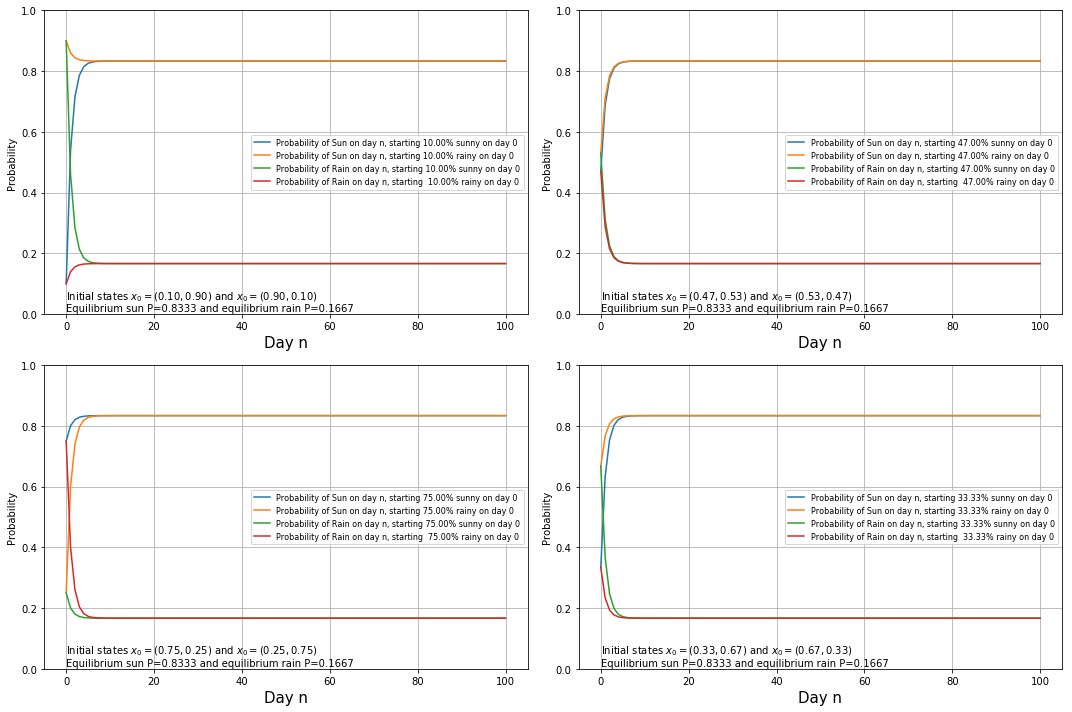

In [461]:
# Check that the final steady state remains the same,
# no matter the initial state vector chosen

fig, ax = plt.subplots(2,2, figsize=(15,10))

P = construct_P(0.9, 0.5)

x1 = np.array([0.1,0.9])
plot_forecast(P, x1, ax[0,0])

x2 = np.array([0.47,0.53])
plot_forecast(P, x2, ax[0,1])

x3 = np.array([0.75,0.25])
plot_forecast(P, x3, ax[1,0])

x4 = np.array([1/3,2/3])
plot_forecast(P, x4, ax[1,1])
        
plt.tight_layout()

Even if a different transition matrix, an equilibrium probability distribution of states is expected. Here's an example for 


$$
P = \left(\begin{array}{cc} 
0.31 & 0.69\\
0.87 & 0.13
\end{array}\right)
$$ 

In [515]:
# test predictions an steady state for new transition matrix
a = 0.31
b = 0.69
c = 0.87
d = 0.13

make_predictions(a,b,c,d)

The eigenvalues are:
lambda 1: 1
lambda 2: -0.56

We predict the steady state probability for sun to be 0.557692307692
We predict the steady state probability for rain to be 0.442307692308


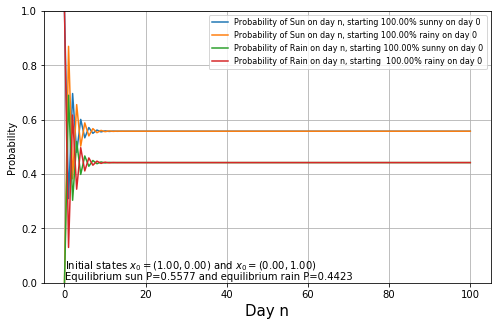

In [516]:
x0 = np.array([1,0])
P = np.array([[a,b],[c,d]])

fig, ax = plt.subplots(1,1, figsize=(8,5))

plot_forecast(P, x0, ax)

## 4.2 Random-Walk Metropolis

We want to be able to sample from the following distribution,

$$p(x) = \frac{1}{2\sqrt{\pi}}(\sin5x + \sin2x + 2)e^{-x^2}$$

Since $p(x)$ is a more complicated function, the Fundamental Principle cannot easily be applied here to sample from this probability distribution. Instead, to sample from $p(x)$, we apply the Metropolis-Hastings algorithm.

### The Metropolis-Hastings algorithm

We start by selecting a proposal distribution, $q(x)$, from which we will draw test values. In this implementation, we will be using a normal distribution. 

$$q(x \, | \, \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \, \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [13]:
def prob_p(x):
    '''
    Returns the probability that x is sampled from p(x)
    
    p(x) = (2*sqrt(pi))^(-1)*[sin5x + sin2x +2]*exp(-x^2)
    
    '''
    
    # break the function into smaller chunks to prevent entry mistakes 
    piece1 = 1/(2*np.pi)
    
    piece2 = np.sin(5*x) + np.sin(2*x) + 2
    
    piece3 = np.exp(-x*x)
    
    
    # return p(x)
    return piece1*piece2*piece3

In [254]:
def normal_distribution(x, sigma):
    '''
    Uses the Box-Muller method to return a random sample from the normal 
    distribution centered at 'x' and with standard deviation, 'sigma'
    '''
    
    # get two randum numbers from a uniform distribution
    u1 = np.random.rand()
    u2 = np.random.rand()
    
    # using the random numbers sample the normal distribution
    BM = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    
    return sigma*BM+x

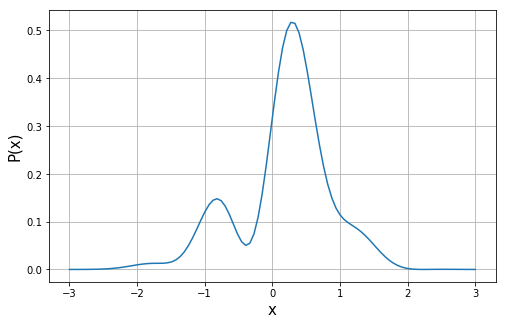

In [436]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

x = np.linspace(-3,3,100)

ax.plot(x, prob_p(x))
ax.grid('on')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('P(x)', fontsize=15);


Starting with the initial point $x_0$, to get the next point in the sequence, the Metropolis-Hastings algorithm proceeds as follows.

**Step 1** Draw a test value, $y$, from the normal distribution centred at the current point, $x_i$ 

$$y \, \tilde{} \, q(y \, | \, x_i, \sigma^2)$$

**Step 2** Get the acceptance probability, $\alpha(x_i,y) \leftarrow min\bigg(1, \frac{p(y)\,q(y, x_i)}{p(x_i)\, q(x_i, y)}\bigg)$

In this case since $\frac{q(y, x_i)}{q(x_i, y)} = 1$, the acceptance probability is,

$$\alpha(x_i,y) \leftarrow min\bigg(1, \frac{p(y)}{p(x_i)}\bigg)$$

**Step 3** Draw a random number, u, between 0 and 1 from a uniform distribution.

**Step 4** If $u<\alpha(x_i,y)$, ACCEPT the change and set $x_{i+1}=y$

**Step 5** If $u>\alpha(x_i,y)$, REJECT the change, $x_{i+1}=x_i$




In [257]:
def metropolis_point(x, sigma, prob, count):
    '''
    Uses the Metropolis-Hastings algorithm to select the next sample, 
    x_n+1 from probability distribution 'prob' given the current value x_n, 
    and the standard deviation chosen for the proposal distribution. 
    
    Returns:
    - x_n+1
    - count
    
    Count = count+1 if the proposed value is accepted and count if
    the proposed value is rejected. 
    
    '''
    
    # Step 1: Draw a test value
    
    y = normal_distribution(x, sigma)
    
    # Step 2: Get the acceptance probability
    
    alpha = np.min([1, prob(y)/prob(x)])
    
    # Step 3: Draw a random number
    
    u = np.random.rand()

    # Step 4: If  u < α, ACCEPT the change
    if alpha > u:
        return y, count + 1
    
    # Step 5 If  u > α, REJECT the change
    else:
        return x, count
    

### Testing Random Walk Metropolis

In [509]:
def random_walk_metropolis(x0, sigma, num_iter, prob, burn_in = 0):
    '''
    Collects 'num_iter' samples from a Metropolis-Hastings chain starting at 'x0'. 
    The standard deviation of the proposal distribution, sigma, and the desired 
    probability distribution, prob, are given in the arguments. 
    If burn_in is set to a value greater than 0, the algorithm uses this value as
    a burn-in period.
    
    This function plots the resulting chain in a two panel figure. The top figure 
    shows a histogram of the samples in the chain with the function p(x) overlaid. The
    bottom figure shows the actual chain of x_n values. 
    '''
        
    # if there is a burn in selected, we should ignore the initial value
    if burn_in ==0:
        x_values = [x0]
    else:
        x_values = []
    
    # begin the count of accepted values with count=0
    count = 0
    
    # collect 'num_iter' samples from the Metropolis-Hastings chain
    next_value = x0
    for n in range(num_iter):
        
        if burn_in==0 or n>burn_in:
            
            next_value, count = metropolis_point(next_value, sigma, prob, count)
            x_values.append(next_value)
            
        else:
            next_value, count2 = metropolis_point(next_value, sigma, prob, count)
      
    
    # plot the results
    
    fig, ax = plt.subplots(2,1, figsize=(15,8))

    # plot the top figure
    
    ax[0].hist(x_values, bins=50, normed=True, facecolor='#FFC1C1', edgecolor='black')
    x = np.linspace(-3,3,100)

    ax[0].plot(x, prob(x), color = 'blue')
    ax[0].grid('on')
    ax[0].set_xlabel('x', fontsize=15)
    ax[0].set_ylabel('P(x)', fontsize=15)
    
    max_y = ax[0].get_ylim()[1]
    
    # annotate the top figure with details including the x_0 and sigma values used
    # as well as the acceptance rate and burn in period (if any)
    if burn_in==0:
        ax[0].annotate('$x_0$ = {} \n$\sigma$ = {} \nAcceptance rate = {:0.4f} \n{} iterations'.format(x0,sigma, count/(num_iter), num_iter)
                   ,xy=(1.5, max_y-max_y*0.4), fontsize=15)
    else:
        ax[0].annotate('$x_0$ = {} \n$\sigma$ = {} \nAcceptance rate = {:0.4f} \n{} iterations \nBurn in = {}'.format(x0,sigma, count/(num_iter-burn_in), num_iter, burn_in)
                   ,xy=(1.5, max_y-max_y*0.5), fontsize=15)
    
    # plot the bottom figure
    
    ax[1].plot(x_values, 'o-', linewidth=0.75, markersize=0.75, markerfacecolor='red', markeredgecolor='red')
    ax[1].grid('on')
    ax[1].set_xlabel('nth iteration', fontsize=15)
    ax[1].set_ylabel('$x_n$', fontsize=15)
    
    plt.tight_layout()
    
    return

### $x_0 = -1$, $\sigma =0.025$, 1000 iterations

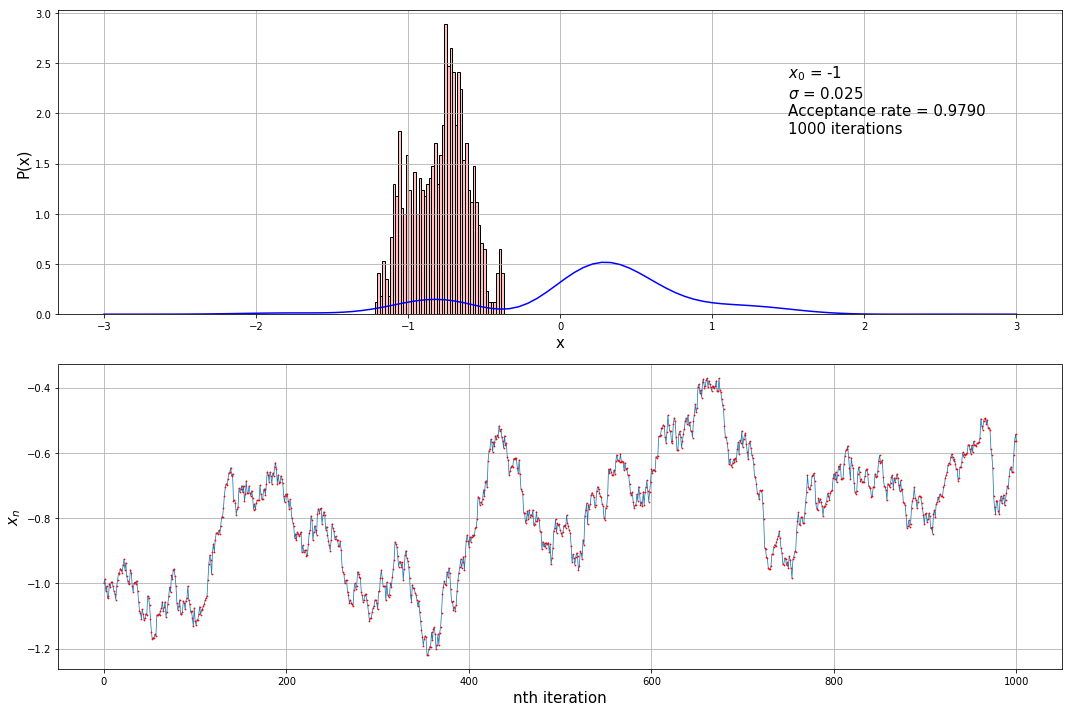

In [490]:
random_walk_metropolis(-1, 0.025, 1000, prob_p)

### $x_0 = -1$, $\sigma =1$, 1000 iterations

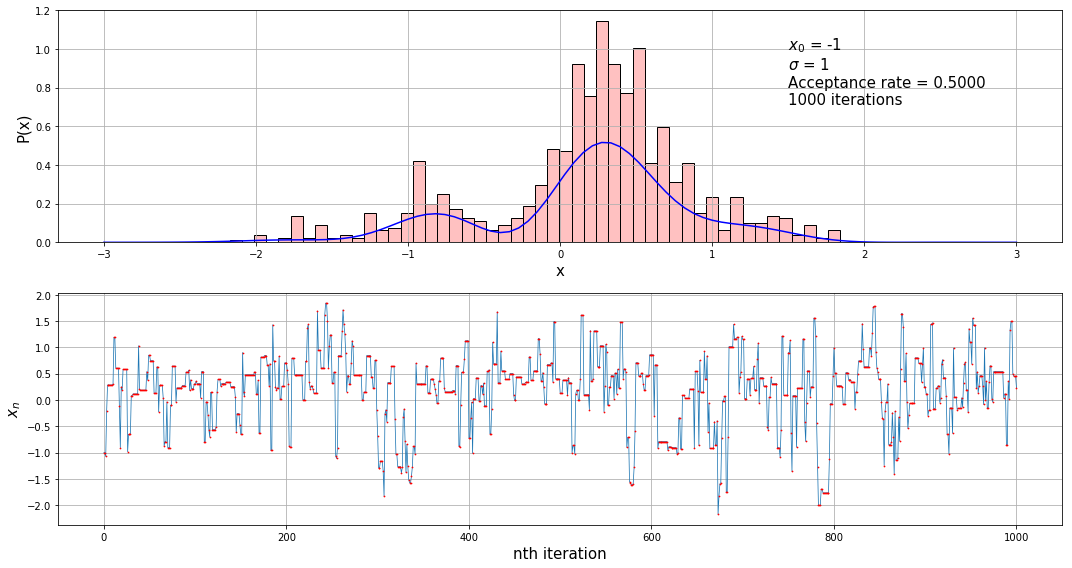

In [492]:
random_walk_metropolis(-1, 1, 1000, prob_p)

### $x_0 = -1$, $\sigma =50$, 1000 iterations

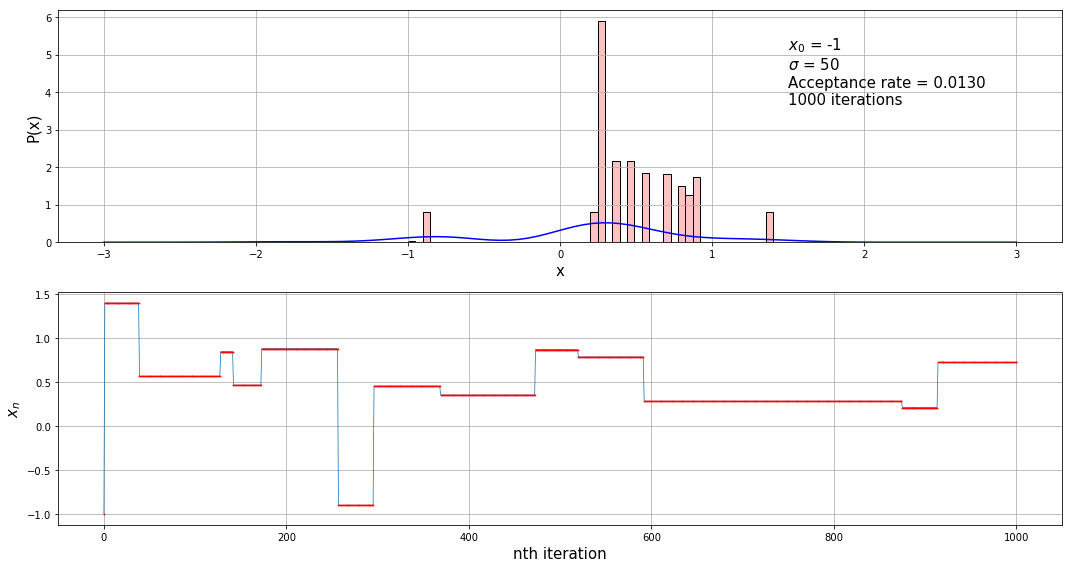

In [494]:
random_walk_metropolis(-1, 50, 1000, prob_p)

### $x_0 = -1$, $\sigma =0.025$, 50000 iterations

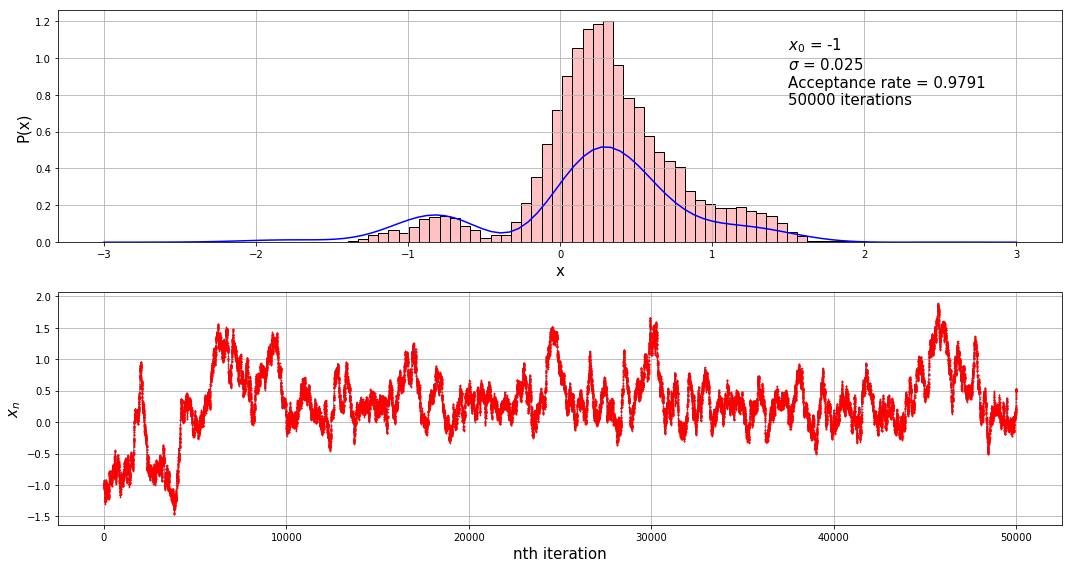

In [496]:
random_walk_metropolis(-1, 0.025, 50000, prob_p)

### $x_0 = -1$, $\sigma =1$, 50000 iterations

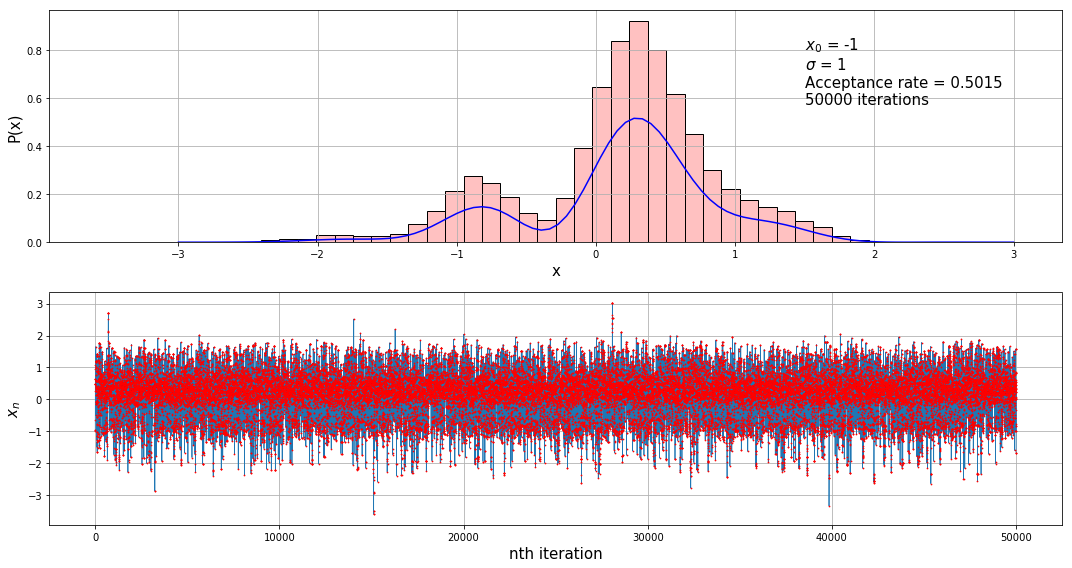

In [497]:
random_walk_metropolis(-1, 1, 50000, prob_p)

### $x_0 = -1$, $\sigma =50$, 50000 iterations

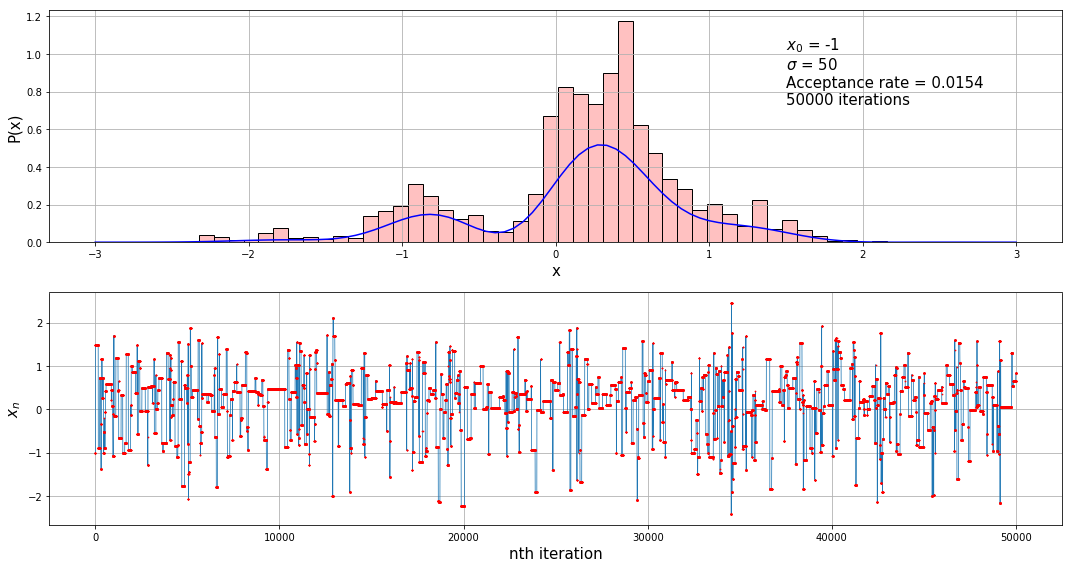

In [498]:
random_walk_metropolis(-1, 50, 50000, prob_p)

### $x_0 = -3$, $\sigma = 0.2$, 1000 iterations, three chains

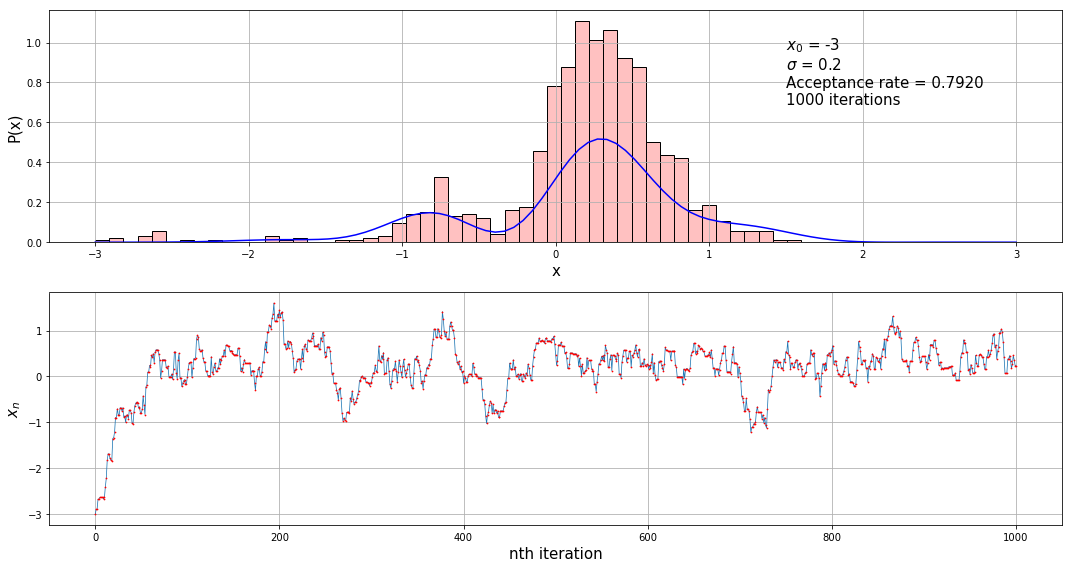

In [501]:
random_walk_metropolis(-3, 0.2, 1000, prob_p)

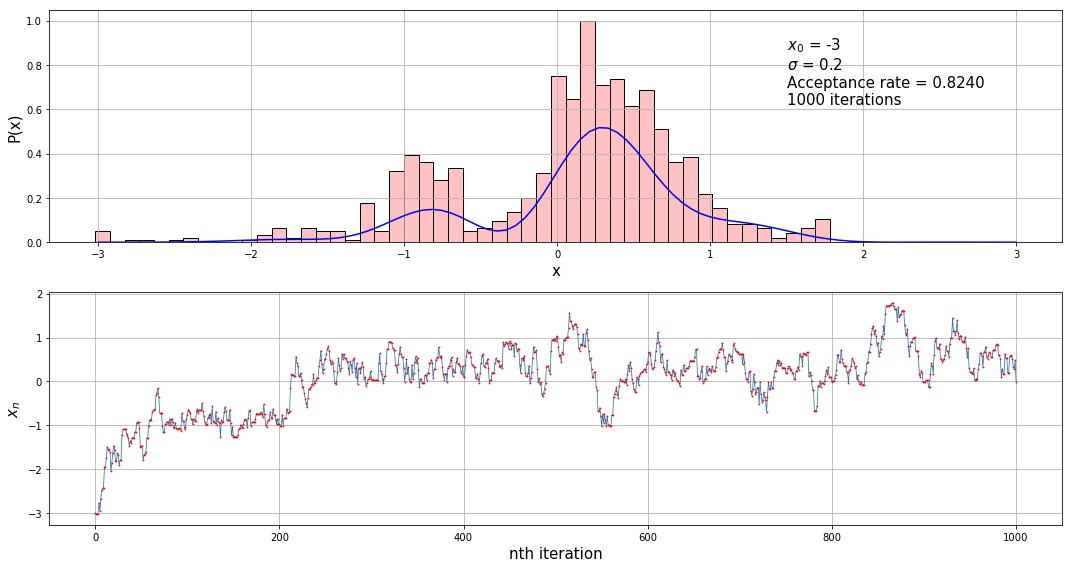

In [502]:
random_walk_metropolis(-3, 0.2, 1000, prob_p)

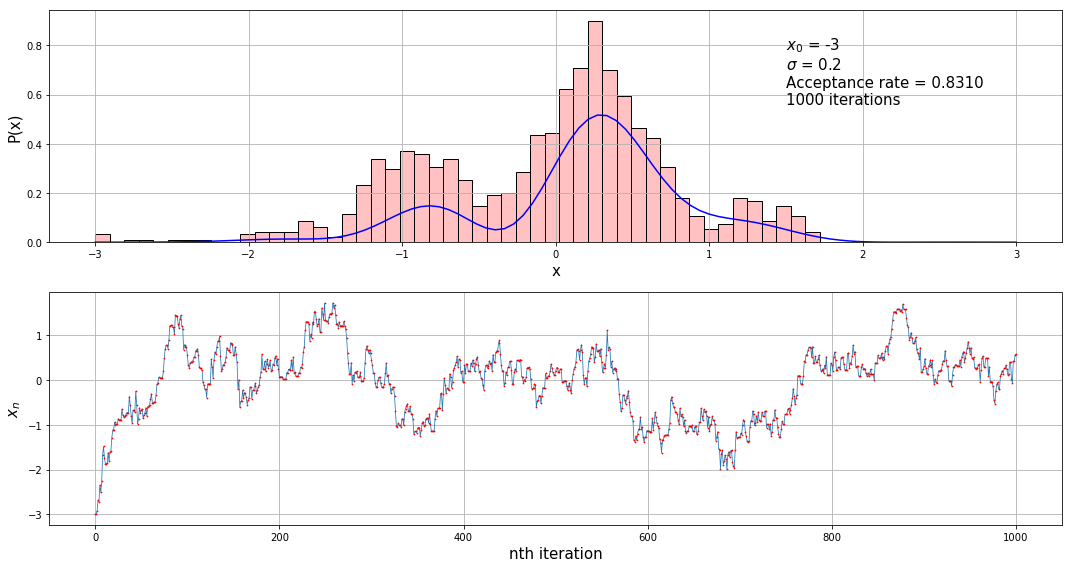

In [503]:
random_walk_metropolis(-3, 0.2, 1000, prob_p)

### $x_0 = -3$, $\sigma =0.2$, 1000 iterations with a burn in period of 200 iterations, three chains

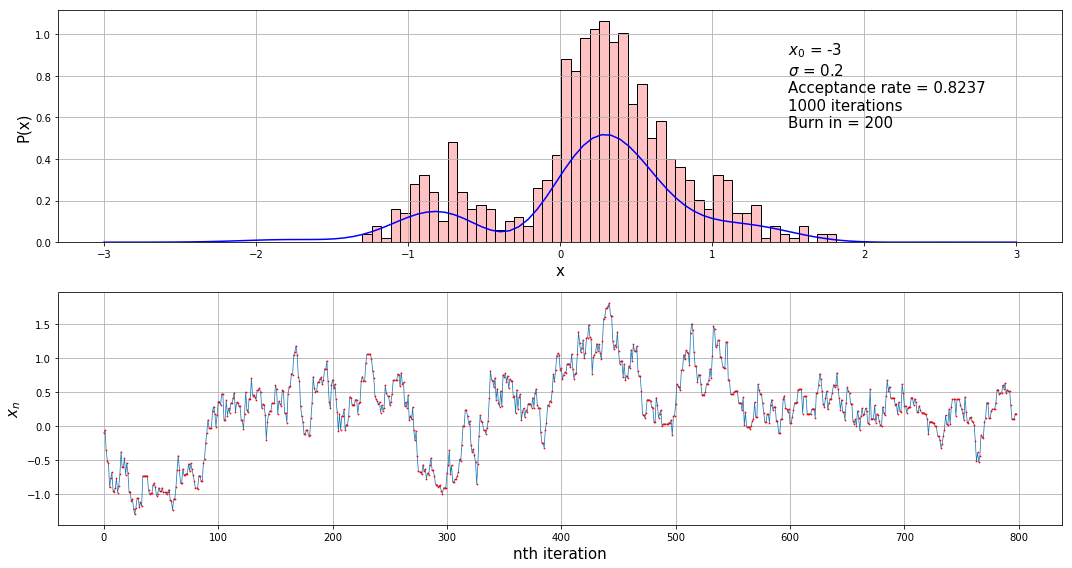

In [513]:
random_walk_metropolis(-3, 0.2, 1000, prob_p, burn_in = 200)

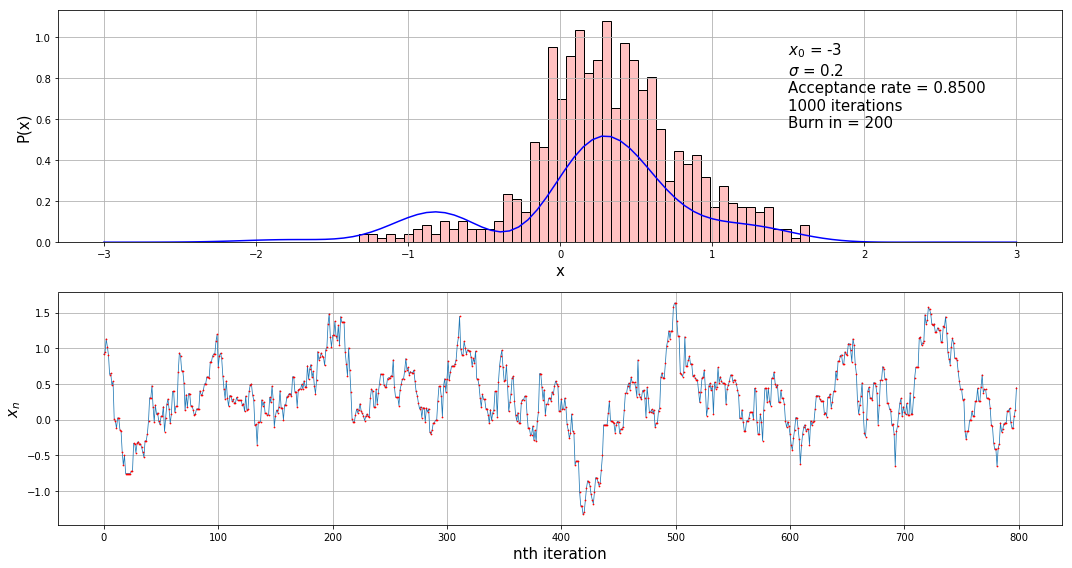

In [517]:
random_walk_metropolis(-3, 0.2, 1000, prob_p, burn_in = 200)

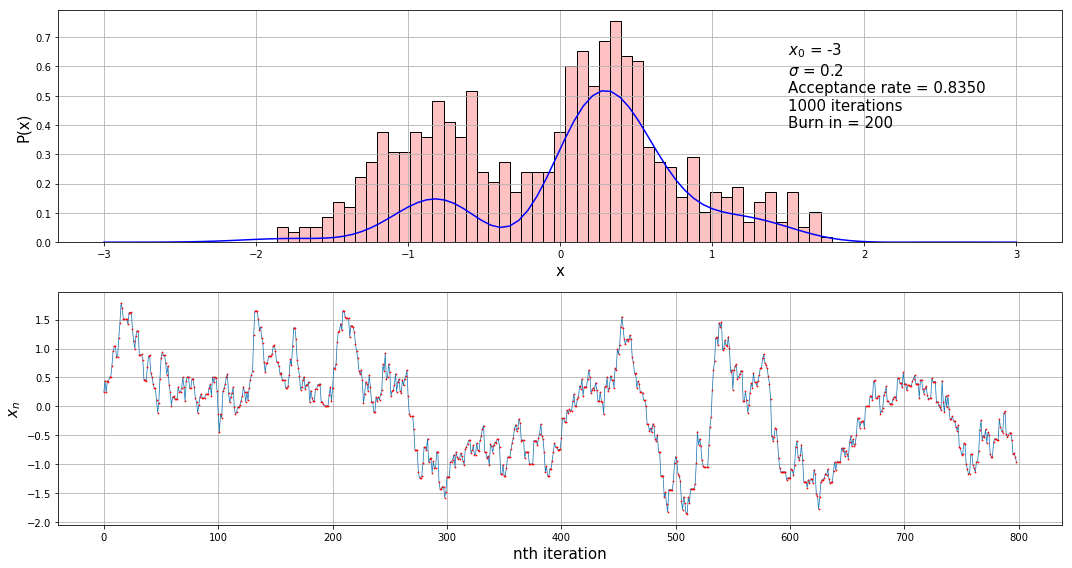

In [518]:
random_walk_metropolis(-3, 0.2, 1000, prob_p, burn_in = 200)